# Importing libraries

In [1]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 27.3 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow import keras
import rdkit
import torch

# Checking the versions of installed libraries
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("RDKit version:", rdkit.__version__)
print("PyTotch version:", torch.__version__)

TensorFlow version: 2.17.1
Keras version: 3.5.0
RDKit version: 2024.03.6
PyTotch version: 2.5.1+cu121


In [3]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [4]:
#Importing RDKit methods
import warnings

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator, rdMolDescriptors
from rdkit import DataStructs
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing data

,Unnamed: 0,Name,Smiles,Ka_mean,mol
0,0,cyclododecylammonium,[NH3+]C1CCCCCCCCCCC1,52000.0,
1,1,"4-(1,1-dimethylpiperidin-1-ium-4-yl)-1,1-dimet...",C[N+]1(C)CCC(CC1)C1CC[N+](C)(C)CC1,45000000.0,
2,2,norbornan-2-ylammonium,[NH3+]C1CC2CCC1C2,640000.0,
3,3,trimethylsilylmethylammonium,C[Si](C)(C)C[NH3+],500000.0,
4,4,"[3,5-dimethyl-7-(trimethylammonio)-1-adamantyl...",CC12CC3(C)CC(C1)(CC(C2)(C3)[N+](C)(C)C)[N+](C)...,9200.0,
5,5,cyclooctylammonium,[NH3+]C1CCCCCCC1,720000.0,
6,6,cyclohexylammonium,[NH3+]C1CCCCC1,130000.0,
7,7,3-[benzyl(dimethyl)ammonio]propane-1-sulfonate,C[N+](C)(CCCS([O-])(=O)=O)CC1=CC=CC=C1,23300.0,
8,8,(3-hydroxy-1-adamantyl)ammonium,[NH3+]C12CC3CC(C1)CC(O)(C3)C2,37000.0,
9,9,trimethyl-[[4-[(trimethylammonio)methyl]phenyl...,C[N+](C)(C)CC1=CC=C(C[N+](C)(C)C)C=C1,16000000.0,

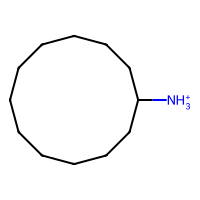
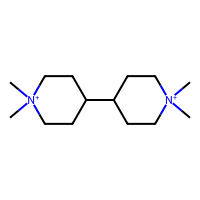
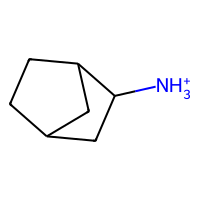
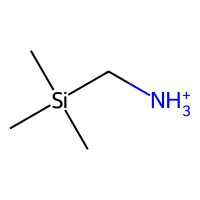
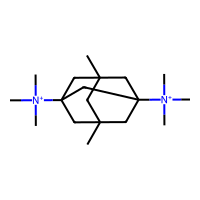
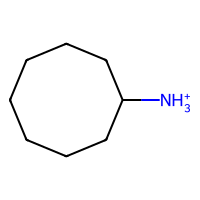
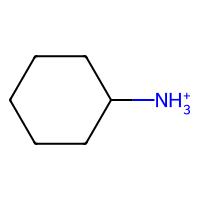
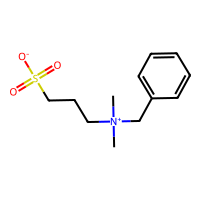
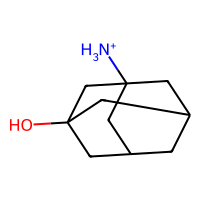
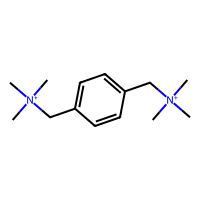
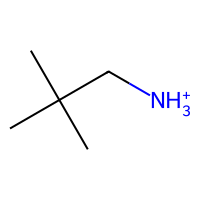
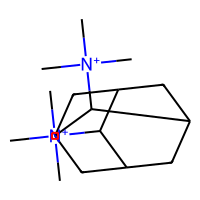
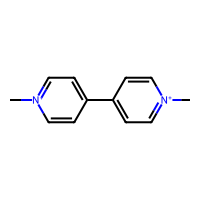
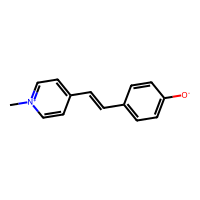
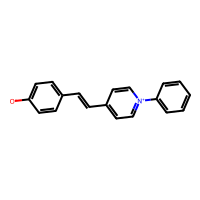
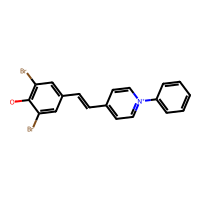
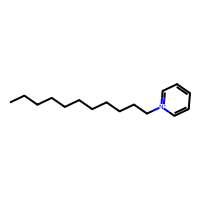
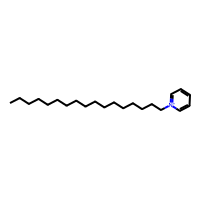
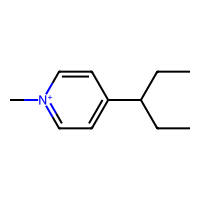
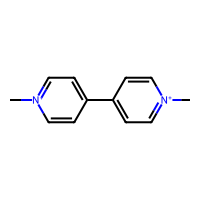
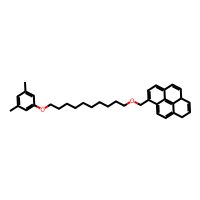

In [7]:
FULL_df = pd.read_csv("/content/drive/MyDrive/Files For Project/GuestsWP6.csv")
FULL_df = FULL_df.drop(["mol"], axis = 1)
PandasTools.AddMoleculeColumnToFrame(FULL_df, 'Smiles', 'mol')
FULL_df

# Molecular Descriptors

### Creation

In [76]:
from rdkit.Chem import Descriptors
prop = [Descriptors.CalcMolDescriptors(mol) for mol in FULL_df["mol"]]
df_prop = pd.DataFrame(prop)
df = pd.concat([FULL_df, df_prop], axis = 1).drop(["Name", "mol", "Smiles", "Unnamed: 0"], axis = 1)
df.sample(3)

,Ka_mean,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,52000.0,4.225495,4.225495,0.749469,0.749469,0.599348,24.692308,184.347,158.139,184.205976,...,0,0,0,0,0,0,0,0,0,0
17,326000.0,2.293903,2.293903,1.179659,1.179659,0.231773,11.000000,318.569,278.249,318.315527,...,0,0,0,0,0,0,0,0,14,0
15,105000.0,11.646595,11.646595,0.036330,-0.036330,0.551369,11.043478,431.127,418.023,428.936388,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#Quantity of descriptors
len(list(df.columns)) - 1

210

### Analysis

In [10]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.0 MB/s eta 0:00:00


In [11]:
from catboost import CatBoostRegressor

In [78]:
from sklearn.model_selection import train_test_split
X = df.drop(["Ka_mean"], axis = 1)
Y = df["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
cb = CatBoostRegressor()
cb.fit(X_train, y_train, verbose=0)

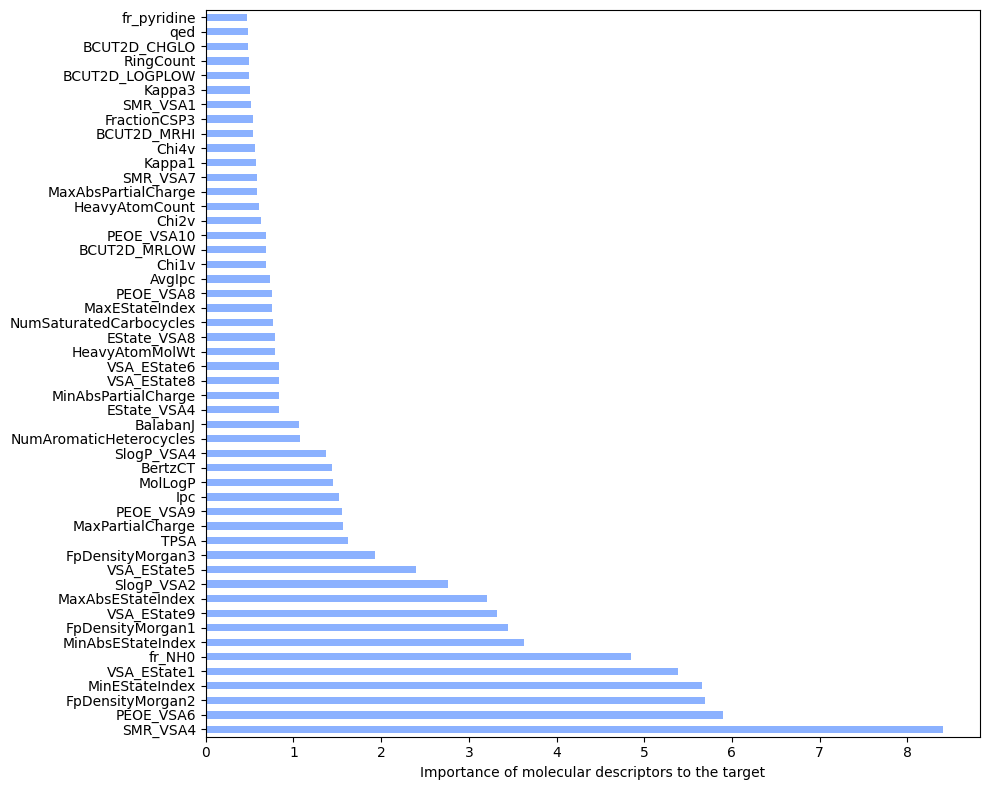

In [81]:
y_pred = cb.predict(X_test)

# Importance of molecular descriptors to the target
fig = plt.figure(figsize=(10,8))
feat_importances = pd.Series(cb.get_feature_importance(), index=X.columns)
feat_importances.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of molecular descriptors to the target')
plt.tight_layout()

In [82]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_importances
})

# Sorting DataFrame by importance and choosing top-10 features
top_features_desc = importance_df.sort_values(by='Importance', ascending=False).head(10)

### Top-10 important descriptors

In [83]:
top_features_desc

,Feature,Importance
SMR_VSA4,SMR_VSA4,8.408524
PEOE_VSA6,PEOE_VSA6,5.898335
FpDensityMorgan2,FpDensityMorgan2,5.692163
MinEStateIndex,MinEStateIndex,5.654230
VSA_EState1,VSA_EState1,5.388300
fr_NH0,fr_NH0,4.854798
MinAbsEStateIndex,MinAbsEStateIndex,3.632347
FpDensityMorgan1,FpDensityMorgan1,3.452098
VSA_EState9,VSA_EState9,3.326462
MaxAbsEStateIndex,MaxAbsEStateIndex,3.212046


In [84]:
top_desc = list(top_features_desc["Feature"])

In [85]:
#Creating dataset only with relevant descriptors
DF = df[top_desc]
DF = DF.assign(Ka_mean = df["Ka_mean"])

### Normalization

In [86]:
DF.sample(3)

,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
20,0.000000,93.160846,1.486486,0.437406,12.058105,0,0.437406,0.756757,0.000000,6.133870,80400.0
13,7.047672,36.417508,1.375000,0.045265,1.989647,1,0.045265,0.875000,1.986574,10.906542,124000.0
8,11.835812,0.000000,1.666667,-0.299769,0.000000,0,0.262731,1.083333,0.000000,10.227708,37000.0


In [87]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
cols_for_nor = list(DF.columns)

#Creating transformator for normalization Y
ct = make_column_transformer((MinMaxScaler(), cols_for_nor))

np.random.seed(42)

#Transforming
ct.fit(DF[cols_for_nor])
norm = ct.transform(DF[cols_for_nor])
DF_norm = pd.DataFrame(norm, columns = cols_for_nor)

In [88]:
DF_norm.sample(3)

,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
17,0.0,1.000000,0.115312,0.986167,0.071198,0.5,0.939391,0.000000,0.048112,0.018216,0.003106
15,0.0,0.704541,0.489603,0.758148,0.098704,0.5,0.000000,0.355932,0.048112,1.000000,0.000939


# Fingerprints

## MorganFingerprints

### Creation

In [89]:
df_mf = []

for mol in FULL_df['mol']:
  gen_morgan = rdFingerprintGenerator.GetMorganGenerator(radius = 2, fpSize = 512)
  fp_morgan = gen_morgan.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(fp_morgan, arr)
  df_mf.append(arr)

MF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_mf)], axis = 1)
MF.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0.000420,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.441126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Analysis

In [90]:
cb_morgan = CatBoostRegressor()
X = MF.drop(["Ka_mean"], axis = 1)[:]
y = MF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_morgan.fit(X_train, y_train, verbose=0)

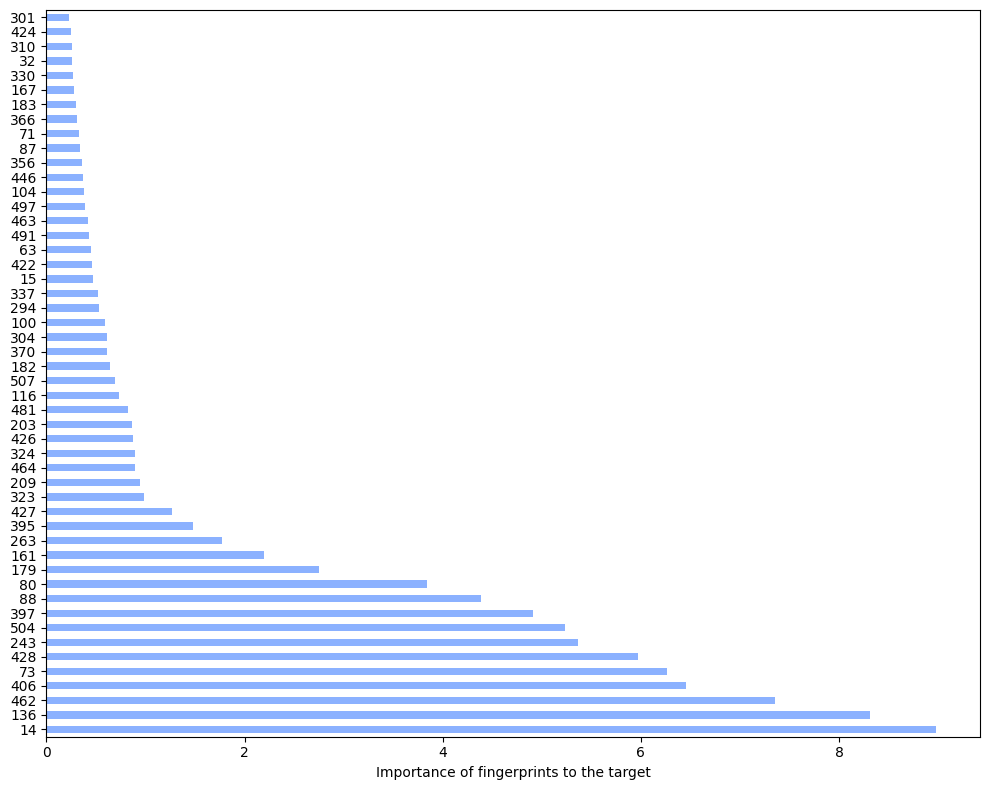

In [91]:
y_pred = cb_morgan.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_morgan = pd.Series(cb_morgan.get_feature_importance(), index=X.columns)
feat_imp_morgan.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [92]:
importance_df_morgan = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_morgan
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_morgan = importance_df_morgan.sort_values(by='Importance', ascending=False).head(15)
top_features_morgan

,Feature,Importance
14,14,8.973942
136,136,8.313117
462,462,7.353431
406,406,6.458040
73,73,6.264583
428,428,5.976050
243,243,5.368219
504,504,5.234428
397,397,4.913340
88,88,4.387884


In [93]:
top_morgan = list(top_features_morgan["Feature"])

### Removal of frequently repeating values

In [94]:
Morgan_data = pd.concat([MF[top_morgan], DF_norm], axis = 1)

In [95]:
Morgan_data.head(3)

,14,136,462,406,73,428,243,504,397,88,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,1,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0,0,0,0,1,0,0,0,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,0,1,0,0,0,1,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [96]:
for col in Morgan_data.columns:
       print(f'Unique values for {col}:\n{Morgan_data[col].value_counts()}\n')

Unique values for 14:
14
0    19
1     2
Name: count, dtype: int64

Unique values for 136:
136
0    19
1     2
Name: count, dtype: int64

Unique values for 462:
462
0    20
1     1
Name: count, dtype: int64

Unique values for 406:
406
0    20
1     1
Name: count, dtype: int64

Unique values for 73:
73
0    18
1     3
Name: count, dtype: int64

Unique values for 428:
428
0    18
1     3
Name: count, dtype: int64

Unique values for 243:
243
0    20
1     1
Name: count, dtype: int64

Unique values for 504:
504
0    20
1     1
Name: count, dtype: int64

Unique values for 397:
397
0    14
1     7
Name: count, dtype: int64

Unique values for 88:
88
0    20
1     1
Name: count, dtype: int64

Unique values for 80:
80
0    13
1     8
Name: count, dtype: int64

Unique values for 179:
179
0    16
1     5
Name: count, dtype: int64

Unique values for 161:
161
0    17
1     4
Name: count, dtype: int64

Unique values for 263:
263
0    17
1     4
Name: count, dtype: int64

Unique values for 395:
395
0

In [97]:
def analyze_repetition(dataframe):
    # A list for headers of columns with high percentage repeating values
    high_repetition_columns = []

    # Chekcing all columns in DataFrame
    for col in dataframe.columns:
        # Getting quantity of repeating values in column
        value_counts = dataframe[col].value_counts(normalize=True)

        # Calculating the max percent of repeating values
        max_percentage = value_counts.max() * 100

        if max_percentage > 80:
            high_repetition_columns.append(col)

    return high_repetition_columns

In [98]:
analyze_repetition(Morgan_data)

[14, 136, 462, 406, 73, 428, 243, 504, 88, 161, 263, 395]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [99]:
MORGAN_data = Morgan_data.drop(analyze_repetition(Morgan_data), axis = 1)
MORGAN_data.head(3)

,397,80,179,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,1,0,0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0,0,0,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,1,0,0,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


## Avalon Fingerprints

### Creation

In [100]:
df_avalon = []

for mol in FULL_df['mol']:
  gen_avalon = pyAvalonTools.GetAvalonFP(mol, nBits = 512)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(gen_avalon, arr)
  df_avalon.append(arr)

AVALON = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_avalon)], axis = 1)
AVALON.head(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
0,0.000420,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.441126,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

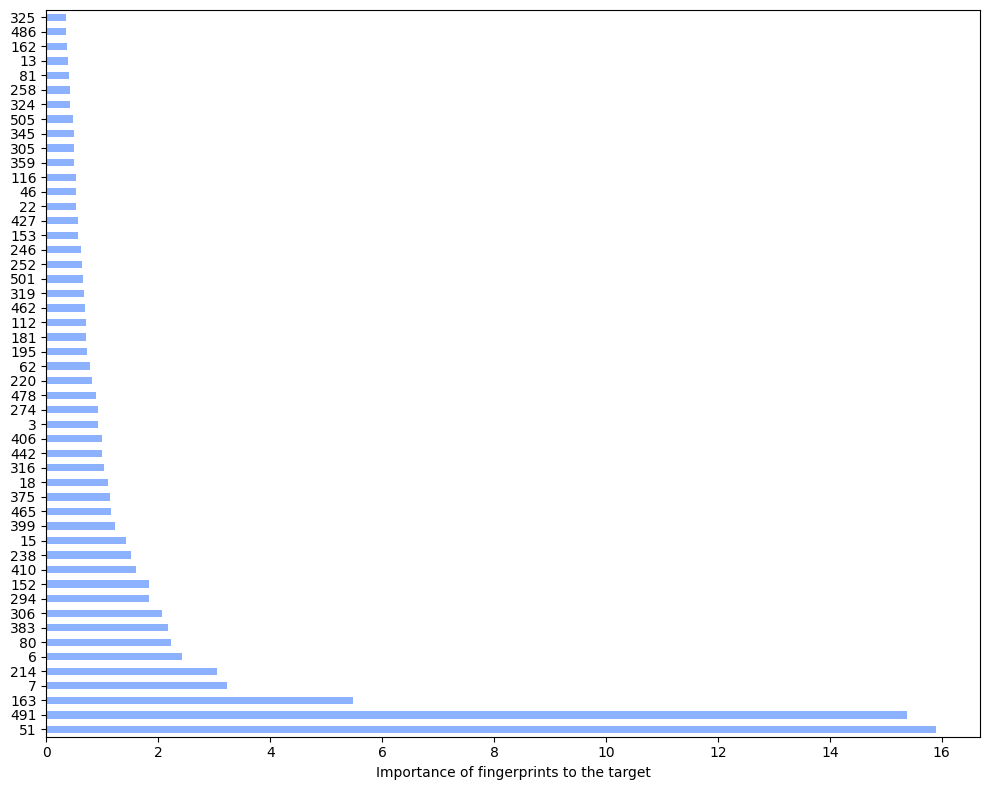

In [101]:
cb_av = CatBoostRegressor()
X = AVALON.drop(["Ka_mean"], axis = 1)[:]
y = AVALON["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_av.fit(X_train, y_train, verbose=0)

y_pred = cb_av.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_avalon = pd.Series(cb_av.get_feature_importance(), index=X.columns)
feat_imp_avalon.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [102]:
importance_df_avalon = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_avalon
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_avalon = importance_df_avalon.sort_values(by='Importance', ascending=False).head(15)
top_avalon = list(top_features_avalon["Feature"])
top_features_avalon

,Feature,Importance
51,51,15.889461
491,491,15.372628
163,163,5.478310
7,7,3.237082
214,214,3.047473
6,6,2.420700
80,80,2.226694
383,383,2.175786
306,306,2.065505
294,294,1.840044


### Removal of frequently repeating values

In [103]:
Avalon_data = pd.concat([AVALON[top_avalon], DF_norm], axis = 1)
Avalon_data.head(3)

,51,491,163,7,214,6,80,383,306,294,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,1,1,0,1,0,0,0,1,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,0,0,0,1,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [104]:
for col in Avalon_data.columns:
       print(f'Uniqie values for {col}:\n{Avalon_data[col].value_counts()}\n')

Uniqie values for 51:
51
0    13
1     8
Name: count, dtype: int64

Uniqie values for 491:
491
0    18
1     3
Name: count, dtype: int64

Uniqie values for 163:
163
0    16
1     5
Name: count, dtype: int64

Uniqie values for 7:
7
0    20
1     1
Name: count, dtype: int64

Uniqie values for 214:
214
0    11
1    10
Name: count, dtype: int64

Uniqie values for 6:
6
0    20
1     1
Name: count, dtype: int64

Uniqie values for 80:
80
0    14
1     7
Name: count, dtype: int64

Uniqie values for 383:
383
0    15
1     6
Name: count, dtype: int64

Uniqie values for 306:
306
0    15
1     6
Name: count, dtype: int64

Uniqie values for 294:
294
0    20
1     1
Name: count, dtype: int64

Uniqie values for 152:
152
0    18
1     3
Name: count, dtype: int64

Uniqie values for 410:
410
0    14
1     7
Name: count, dtype: int64

Uniqie values for 238:
238
0    20
1     1
Name: count, dtype: int64

Uniqie values for 15:
15
0    18
1     3
Name: count, dtype: int64

Uniqie values for 399:
399
0    11

In [105]:
analyze_repetition(Avalon_data)

[491, 7, 6, 294, 152, 238, 15]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [106]:
AVALON_data = Avalon_data.drop(analyze_repetition(Avalon_data), axis = 1)
AVALON_data.head(3)

,51,163,214,80,383,306,410,399,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,1,1,0,0,1,0,1,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,1,0,0,0,0,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


## PatternFingerprints

### Creation

In [107]:
df_pf = []

for mol in FULL_df['mol']:
  pf = Chem.rdmolops.PatternFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(pf, arr)
  df_pf.append(arr)

PF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
PF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
20,0.000698,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
13,0.001126,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0.000273,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Analysis

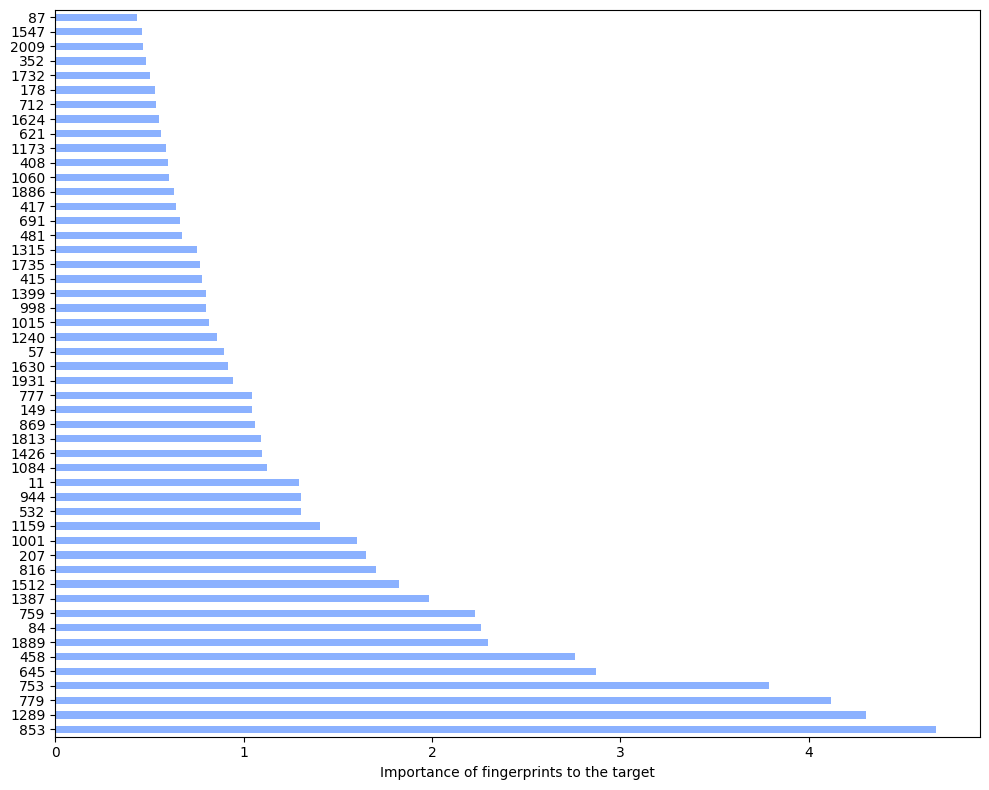

In [108]:
cb_pf = CatBoostRegressor()
X = PF.drop(["Ka_mean"], axis = 1)[:]
y = PF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_pf.fit(X_train, y_train, verbose=0)

y_pred = cb_pf.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_PF = pd.Series(cb_pf.get_feature_importance(), index=X.columns)
feat_imp_PF.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

There's no point in continuing - these fingerprint weakly correlate with the target

## MACCS

### Creation

In [109]:
df_maccs = []

for mol in FULL_df['mol']:
  maccs = MACCSkeys.GenMACCSKeys(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(maccs, arr)
  df_maccs.append(arr)

MACCS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_pf)], axis = 1)
MACCS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
16,0.001126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.006969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0.000233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Analysis

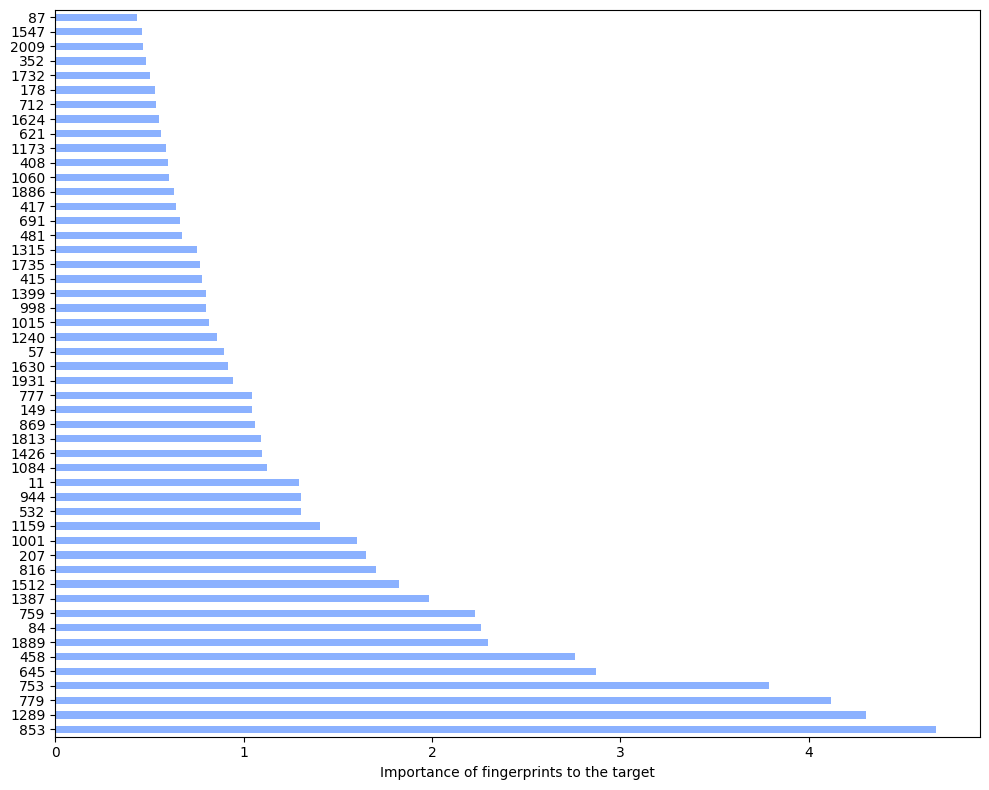

In [110]:
cb_mc = CatBoostRegressor()
X = MACCS.drop(["Ka_mean"], axis = 1)[:]
y = MACCS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_mc.fit(X_train, y_train, verbose=0)

y_pred = cb_mc.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_maccs = pd.Series(cb_mc.get_feature_importance(), index=X.columns)
feat_imp_maccs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

MACCS also weakly correlates with the target

## AtomPairs Fingerprints

### Creation

In [111]:
df_atom = []

apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=512)
for mol in FULL_df['mol']:
  atomgen = apgen.GetFingerprint(mol)
  arr = np.zeros((0,), dtype = np.int8)
  DataStructs.ConvertToNumpyArray(atomgen, arr)
  df_atom.append(arr)

ATOMPAIRS = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_atom)], axis = 1)
ATOMPAIRS.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
4,0.000000,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0.000233,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

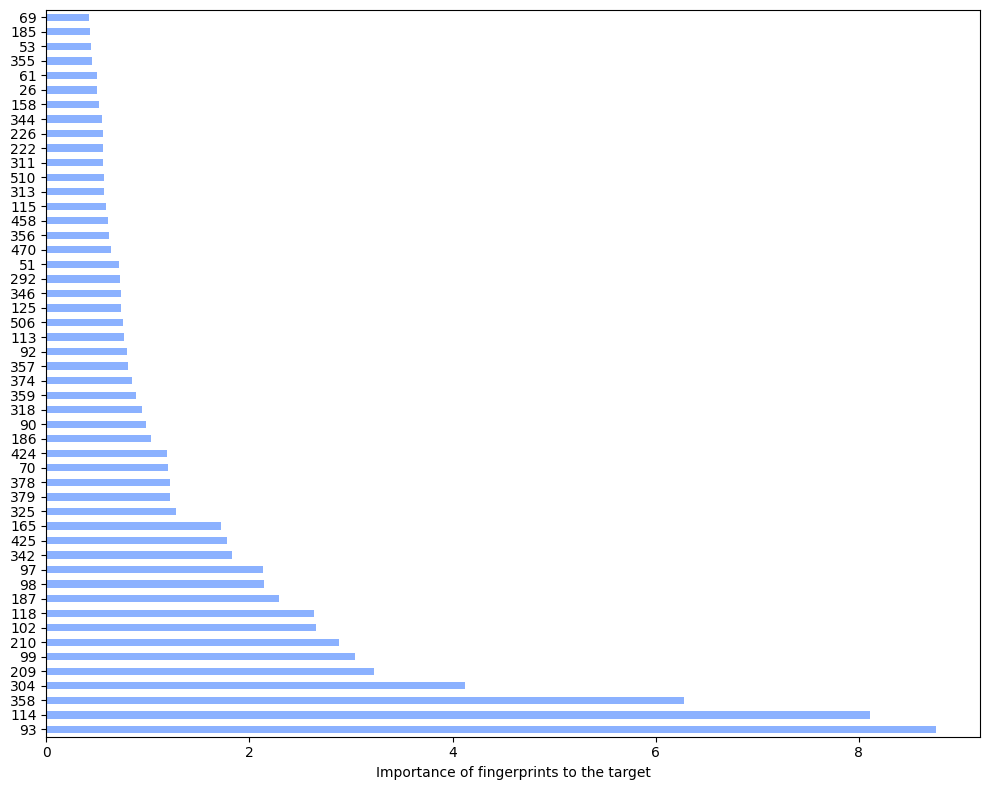

In [112]:
cb_atom = CatBoostRegressor()
X = ATOMPAIRS.drop(["Ka_mean"], axis = 1)[:]
y = ATOMPAIRS["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_atom.fit(X_train, y_train, verbose=0)

y_pred = cb_atom.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_atompairs = pd.Series(cb_atom.get_feature_importance(), index=X.columns)
feat_imp_atompairs.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [113]:
importance_df_atompairs = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_atompairs
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_atompairs = importance_df_atompairs.sort_values(by='Importance', ascending=False).head(15)
top_atompairs = list(top_features_atompairs["Feature"])
top_features_atompairs

,Feature,Importance
93,93,8.755753
114,114,8.114272
358,358,6.280302
304,304,4.123778
209,209,3.226862
99,99,3.039471
210,210,2.883112
102,102,2.650751
118,118,2.633144
187,187,2.294384


### Removal of frequently repeating values

In [114]:
AtomPairs_data = pd.concat([ATOMPAIRS[top_atompairs], DF_norm], axis = 1)
AtomPairs_data.head(3)

,93,114,358,304,209,99,210,102,118,187,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,1,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,1,1,0,0,0,1,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,1,0,0,0,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [115]:
for col in AtomPairs_data.columns:
       print(f'Unique values for {col}:\n{AtomPairs_data[col].value_counts()}\n')

Unique values for 93:
93
0    18
1     3
Name: count, dtype: int64

Unique values for 114:
114
0    17
1     4
Name: count, dtype: int64

Unique values for 358:
358
0    19
1     2
Name: count, dtype: int64

Unique values for 304:
304
1    16
0     5
Name: count, dtype: int64

Unique values for 209:
209
0    16
1     5
Name: count, dtype: int64

Unique values for 99:
99
0    20
1     1
Name: count, dtype: int64

Unique values for 210:
210
0    20
1     1
Name: count, dtype: int64

Unique values for 102:
102
0    17
1     4
Name: count, dtype: int64

Unique values for 118:
118
0    20
1     1
Name: count, dtype: int64

Unique values for 187:
187
0    20
1     1
Name: count, dtype: int64

Unique values for 98:
98
0    20
1     1
Name: count, dtype: int64

Unique values for 97:
97
0    20
1     1
Name: count, dtype: int64

Unique values for 342:
342
0    19
1     2
Name: count, dtype: int64

Unique values for 425:
425
0    18
1     3
Name: count, dtype: int64

Unique values for 165:
165
0

In [116]:
analyze_repetition(AtomPairs_data)

[93, 114, 358, 99, 210, 102, 118, 187, 98, 97, 342, 425, 165]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [117]:
ATOM_data = AtomPairs_data.drop(analyze_repetition(AtomPairs_data), axis = 1)
ATOM_data.head(3)

,304,209,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,1,0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,1,0,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


## TopologicalTorsionGenerator

### Creation

In [118]:
df_ttf = []

ttfgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=512)
for mol in FULL_df['mol']:
  ttf = ttfgen.GetFingerprint(mol)
  arr = np.array(ttf)
  df_ttf.append(arr)

TTF = pd.concat([DF_norm["Ka_mean"], pd.DataFrame(df_ttf)], axis = 1)
TTF.sample(3)

,Ka_mean,0,1,2,3,4,5,6,7,8,...,502,503,504,505,506,507,508,509,510,511
1,0.441126,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.006969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.006185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Analysis

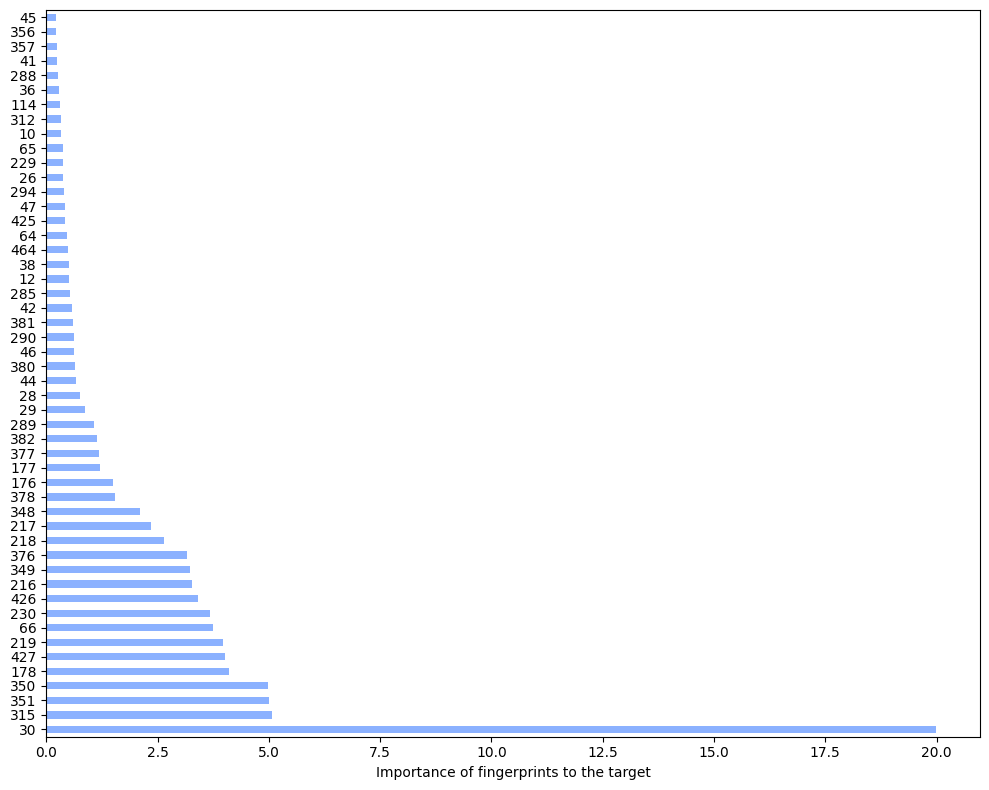

In [119]:
cb_ttf = CatBoostRegressor()
X = TTF.drop(["Ka_mean"], axis = 1)[:]
y = TTF["Ka_mean"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.1, random_state=42)

cb_ttf.fit(X_train, y_train, verbose=0)

y_pred = cb_ttf.predict(X_test)

# Importance of features
fig = plt.figure(figsize=(10,8))
feat_imp_ttf = pd.Series(cb_ttf.get_feature_importance(), index=X.columns)
feat_imp_ttf.nlargest(50).plot(kind='barh', color = '#5A91FF', alpha=0.7)
plt.xlabel('Importance of fingerprints to the target')
plt.tight_layout()

In [120]:
importance_df_ttf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feat_imp_ttf
})

# Sorting DataFrame by importance and choosing top-15 features
top_features_ttf = importance_df_ttf.sort_values(by='Importance', ascending=False).head(15)
top_ttf = list(top_features_ttf["Feature"])
top_features_ttf

,Feature,Importance
30,30,19.976682
315,315,5.080676
351,351,5.002980
350,350,4.978283
178,178,4.112256
427,427,4.007953
219,219,3.974548
66,66,3.748118
230,230,3.673137
426,426,3.416914


### Removal of frequently repeating values

In [121]:
TopTors_data = pd.concat([TTF[top_ttf], DF_norm], axis = 1)
TopTors_data.head(3)

,30,315,351,350,178,427,219,66,230,426,...,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0,0,0,0,0,0,0,0,0,0,...,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


In [122]:
for col in TopTors_data.columns:
       print(f'Unique values for {col}:\n{TopTors_data[col].value_counts()}\n')

Unique values for 30:
30
0    18
1     3
Name: count, dtype: int64

Unique values for 315:
315
0    20
1     1
Name: count, dtype: int64

Unique values for 351:
351
0    20
1     1
Name: count, dtype: int64

Unique values for 350:
350
0    20
1     1
Name: count, dtype: int64

Unique values for 178:
178
0    19
1     2
Name: count, dtype: int64

Unique values for 427:
427
0    20
1     1
Name: count, dtype: int64

Unique values for 219:
219
0    20
1     1
Name: count, dtype: int64

Unique values for 66:
66
0    19
1     2
Name: count, dtype: int64

Unique values for 230:
230
0    19
1     2
Name: count, dtype: int64

Unique values for 426:
426
0    20
1     1
Name: count, dtype: int64

Unique values for 216:
216
0    20
1     1
Name: count, dtype: int64

Unique values for 349:
349
0    20
1     1
Name: count, dtype: int64

Unique values for 376:
376
0    18
1     3
Name: count, dtype: int64

Unique values for 218:
218
0    20
1     1
Name: count, dtype: int64

Unique values for 217:
2

In [123]:
analyze_repetition(TopTors_data)

[30, 315, 351, 350, 178, 427, 219, 66, 230, 426, 216, 349, 376, 218, 217]

### **Ready Dataset**



> Includes binding constants, molecular descriptors and fingerprints

In [124]:
TTF_data = TopTors_data.drop(analyze_repetition(TopTors_data), axis = 1)
TTF_data.head(3)

,SMR_VSA4,PEOE_VSA6,FpDensityMorgan2,MinEStateIndex,VSA_EState1,fr_NH0,MinAbsEStateIndex,FpDensityMorgan1,VSA_EState9,MaxAbsEStateIndex,Ka_mean
0,0.0,0.465948,0.096990,0.905499,0.000000,0.0,0.585935,0.070404,0.048112,0.220982,0.000420
1,0.5,0.000000,0.070652,0.961411,0.077888,1.0,0.830920,0.098517,0.666724,0.027884,0.441126
2,0.5,0.000000,1.000000,0.920140,0.000000,0.0,0.650086,0.756356,0.048112,0.209927,0.006185


# Correlation matrixes for all datasets

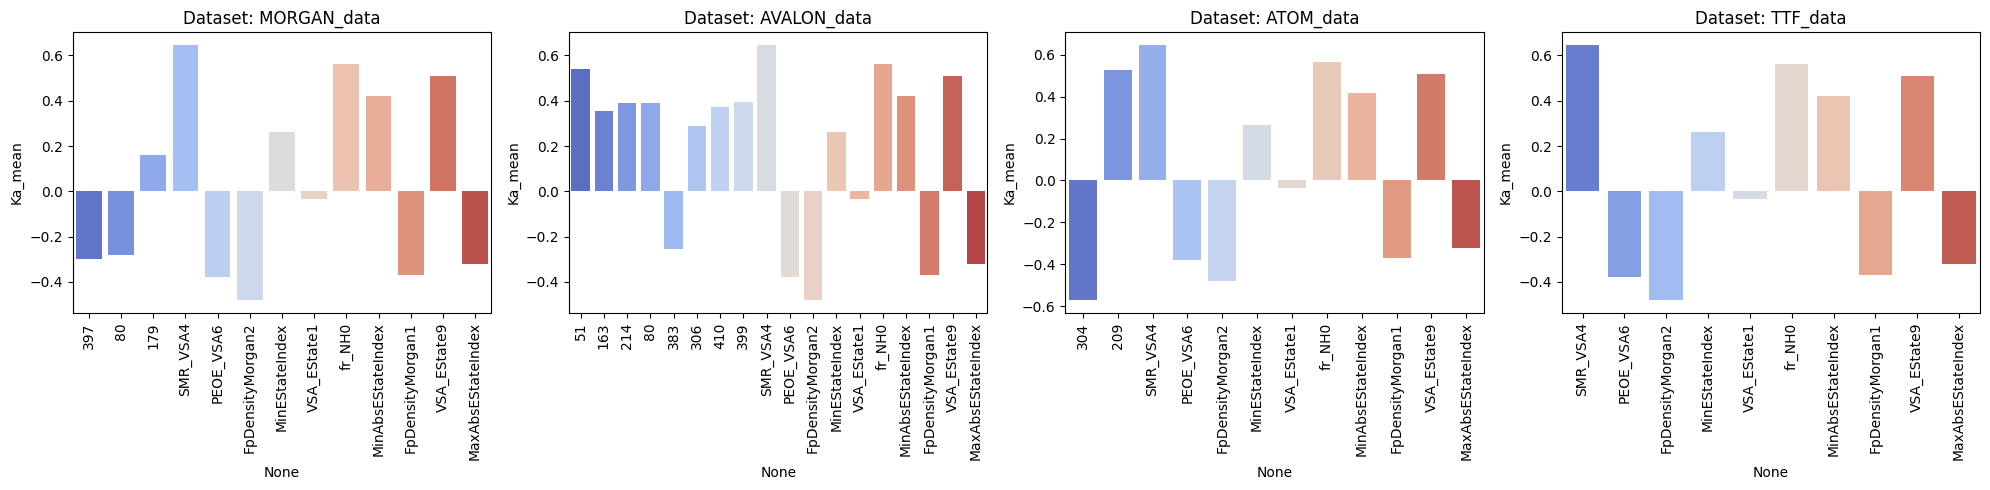

In [125]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('AVALON_data', AVALON_data),
    ('ATOM_data', ATOM_data),
    ('TTF_data', TTF_data)
]

target_column = 'Ka_mean'

plt.figure(figsize=(20, 5))

for i, (name, df) in enumerate(datasets):
    if target_column not in df.columns:
        print(f"Target column '{target_column}' is missed in {name}.")
        continue  # Skip this dataset if the target column is missed

    # Calculating correlation
    correlation_matrix = df.corr()

    # Checking if there is a target column in the correlation matrix
    if target_column not in correlation_matrix.columns:
        print(f"Column '{target_column}' missed in correlation for {name}.")
        continue

    # Getting correlations with target column
    target_correlation = correlation_matrix[target_column]

    # Building barplot only for features which are different from target
    features = target_correlation.index[target_correlation.index != target_column]

    plt.subplot(1, len(datasets), i + 1)
    sns.barplot(x=features, y=target_correlation[features],  palette='coolwarm')
    plt.xticks(rotation=90)
    plt.title(f'Dataset: {name}')

plt.tight_layout()
plt.show()

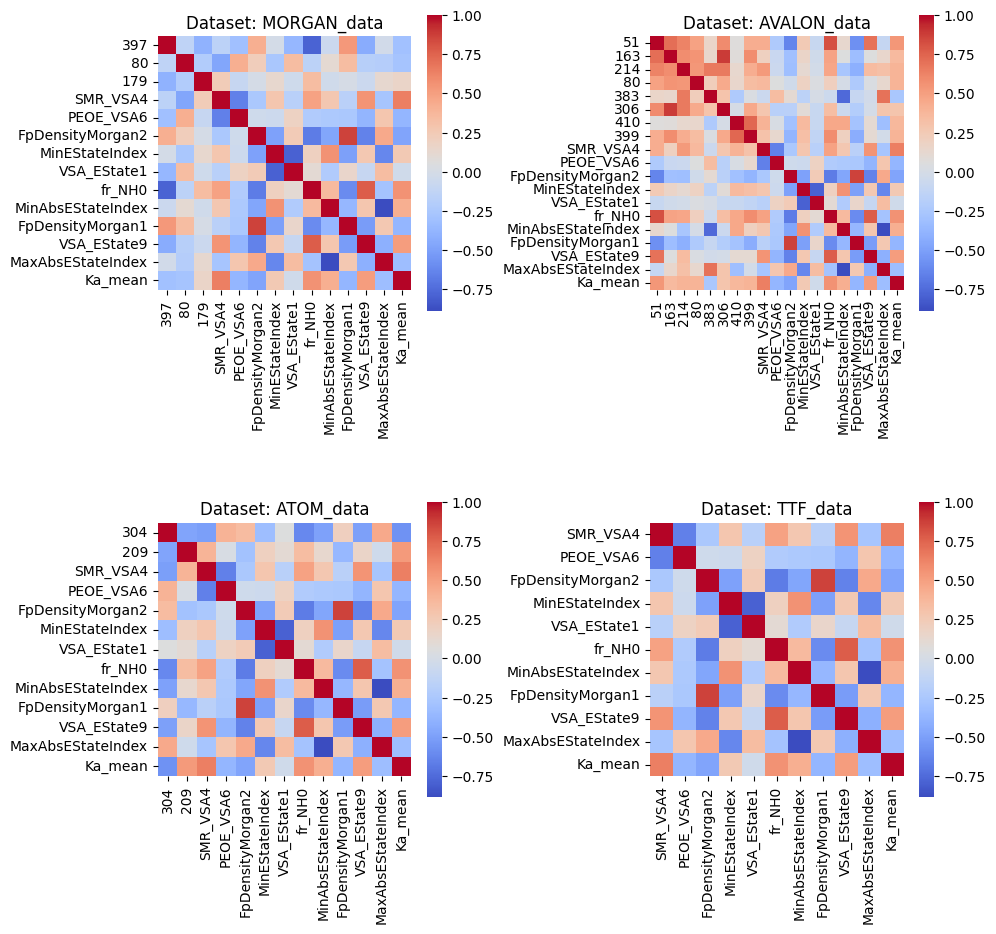

In [126]:
datasets = [
    ('MORGAN_data', MORGAN_data),
    ('AVALON_data', AVALON_data),
    ('ATOM_data', ATOM_data),
    ('TTF_data', TTF_data)
]

plt.figure(figsize=(10, 10))

for i, (name, df) in enumerate(datasets):
    # Calculating correlation
    correlation_matrix = df.corr()

    # Creating a plot
    plt.subplot(2, 2, i + 1)

    # Vizualization of heatmap
    sns.heatmap(correlation_matrix, cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
    plt.title(f'Dataset: {name}')

plt.tight_layout()
plt.show()

Thus, the AVALON_data dataset seems to be the most correlated with the target metric. However, we can notice that all its fingerprints are highly correlated with each other. Thus we can conclude that they will only complicate the training due to their lack of individuality. Therefore, it is more reasonable and promising to choose the second most important dataset - ATOM_data.

In [127]:
ATOM_data.to_csv("AtomPairsData.csv")